In [1]:
import pandas as pd
import numpy as np

### Object Creation

In [2]:
# Creating a Series by passing a list of values, 
# letting pandas create a default integer index:
s = pd.Series([1, 3, 5, np.nan, 6, 8])

In [3]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [4]:
# Creating a DataFrame by passing a NumPy array, with a datetime index and labeled columns:
dates = pd.date_range('20190101', periods=6)

In [5]:
dates

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06'],
              dtype='datetime64[ns]', freq='D')

In [6]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))

In [7]:
df

,A,B,C,D
2019-01-01,-0.033249,-1.129341,1.268255,1.330565
2019-01-02,1.744568,-0.925226,0.649372,-1.024987
2019-01-03,-0.115726,1.193230,-0.116260,-0.093827
2019-01-04,-0.277932,0.199606,-0.051857,0.464384
2019-01-05,0.010244,0.096846,-0.569152,0.155009
2019-01-06,1.105320,-0.957524,0.699840,-2.967669


In [8]:
# Creating a DataFrame by passing a dict of objects that can be converted to series-like.
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo'})

In [9]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [10]:
# The columns of the resulting DataFrame have different dtypes.
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

### Viewing Data

In [11]:
# Here is how to view the top rows of the frame:
df.head()

,A,B,C,D
2019-01-01,-0.033249,-1.129341,1.268255,1.330565
2019-01-02,1.744568,-0.925226,0.649372,-1.024987
2019-01-03,-0.115726,1.193230,-0.116260,-0.093827
2019-01-04,-0.277932,0.199606,-0.051857,0.464384
2019-01-05,0.010244,0.096846,-0.569152,0.155009


In [12]:
# or
df.head(3)

,A,B,C,D
2019-01-01,-0.033249,-1.129341,1.268255,1.330565
2019-01-02,1.744568,-0.925226,0.649372,-1.024987
2019-01-03,-0.115726,1.193230,-0.116260,-0.093827


In [13]:
# Here is how to view the bottom rows of the frame:
df.tail(2)

,A,B,C,D
2019-01-05,0.010244,0.096846,-0.569152,0.155009
2019-01-06,1.105320,-0.957524,0.699840,-2.967669


In [14]:
# Display the index
df.index

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06'],
              dtype='datetime64[ns]', freq='D')

In [19]:
# Display the columns
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [22]:
# DataFrame.values gives a NumPy representation of the underlying data
df.values

array([[-0.0332487 , -1.12934119,  1.26825543,  1.33056475],
       [ 1.74456787, -0.92522586,  0.64937239, -1.02498749],
       [-0.11572571,  1.19322961, -0.11625962, -0.09382653],
       [-0.27793178,  0.19960567, -0.0518572 ,  0.4643837 ],
       [ 0.01024394,  0.09684608, -0.56915193,  0.15500933],
       [ 1.10531957, -0.9575243 ,  0.69983956, -2.96766902]])

In [23]:
# note that DataFrame.values does not include the index or column labels in the output.

In [25]:
# describe() shows a quick statistic summary of your data:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.405538,-0.253735,0.313366,-0.356088
std,0.821016,0.909399,0.673926,1.491023
min,-0.277932,-1.129341,-0.569152,-2.967669
25%,-0.095106,-0.949450,-0.100159,-0.792197
50%,-0.011502,-0.414190,0.298758,0.030591
75%,0.831551,0.173916,0.687223,0.387040
max,1.744568,1.193230,1.268255,1.330565


In [26]:
# Transposing your data:
df.T

,2019-01-01 00:00:00,2019-01-02 00:00:00,2019-01-03 00:00:00,2019-01-04 00:00:00,2019-01-05 00:00:00,2019-01-06 00:00:00
A,-0.033249,1.744568,-0.115726,-0.277932,0.010244,1.105320
B,-1.129341,-0.925226,1.193230,0.199606,0.096846,-0.957524
C,1.268255,0.649372,-0.116260,-0.051857,-0.569152,0.699840
D,1.330565,-1.024987,-0.093827,0.464384,0.155009,-2.967669


In [27]:
# Sorting by an axis:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2019-01-01,1.330565,1.268255,-1.129341,-0.033249
2019-01-02,-1.024987,0.649372,-0.925226,1.744568
2019-01-03,-0.093827,-0.116260,1.193230,-0.115726
2019-01-04,0.464384,-0.051857,0.199606,-0.277932
2019-01-05,0.155009,-0.569152,0.096846,0.010244
2019-01-06,-2.967669,0.699840,-0.957524,1.105320


In [28]:
# Sorting by values
df.sort_values(by='B')

,A,B,C,D
2019-01-01,-0.033249,-1.129341,1.268255,1.330565
2019-01-06,1.105320,-0.957524,0.699840,-2.967669
2019-01-02,1.744568,-0.925226,0.649372,-1.024987
2019-01-05,0.010244,0.096846,-0.569152,0.155009
2019-01-04,-0.277932,0.199606,-0.051857,0.464384
2019-01-03,-0.115726,1.193230,-0.116260,-0.093827


### SELECTION

In [29]:
# Selecting a single column, which yields a Series, equivalent to df.A:
df['A']

2019-01-01   -0.033249
2019-01-02    1.744568
2019-01-03   -0.115726
2019-01-04   -0.277932
2019-01-05    0.010244
2019-01-06    1.105320
Freq: D, Name: A, dtype: float64

In [30]:
df.A

2019-01-01   -0.033249
2019-01-02    1.744568
2019-01-03   -0.115726
2019-01-04   -0.277932
2019-01-05    0.010244
2019-01-06    1.105320
Freq: D, Name: A, dtype: float64

In [31]:
# Selecting via [], which slices the rows.
df[0:3]

,A,B,C,D
2019-01-01,-0.033249,-1.129341,1.268255,1.330565
2019-01-02,1.744568,-0.925226,0.649372,-1.024987
2019-01-03,-0.115726,1.193230,-0.116260,-0.093827


In [32]:
df['20190102':'20190104']

,A,B,C,D
2019-01-02,1.744568,-0.925226,0.649372,-1.024987
2019-01-03,-0.115726,1.193230,-0.116260,-0.093827
2019-01-04,-0.277932,0.199606,-0.051857,0.464384


#### Selection by Label

In [33]:
# For getting a cross section using a label:
df.loc[dates[0]]

A   -0.033249
B   -1.129341
C    1.268255
D    1.330565
Name: 2019-01-01 00:00:00, dtype: float64

In [34]:
# Selecting on a multi-axis by label:
df.loc[:, ['A', 'B']]

,A,B
2019-01-01,-0.033249,-1.129341
2019-01-02,1.744568,-0.925226
2019-01-03,-0.115726,1.193230
2019-01-04,-0.277932,0.199606
2019-01-05,0.010244,0.096846
2019-01-06,1.105320,-0.957524


In [35]:
# Showing label slicing, both endpoints are included:
df.loc['20190102':'20190104', ['A', 'B']]

,A,B
2019-01-02,1.744568,-0.925226
2019-01-03,-0.115726,1.193230
2019-01-04,-0.277932,0.199606


In [37]:
# Reduction in the dimensions of the returned object:
df.loc['20190102', ['A', 'B']]

A    1.744568
B   -0.925226
Name: 2019-01-02 00:00:00, dtype: float64

In [38]:
# For getting a scalar value:
df.loc[dates[0], 'A']

-0.03324869585781989

In [39]:
# For getting fast access to a scalar (equivalent to the prior method):
df.at[dates[0], 'A']

-0.03324869585781989

#### Selection by Position

In [40]:
# Select via the position of the passed integers:
df.iloc[3]

A   -0.277932
B    0.199606
C   -0.051857
D    0.464384
Name: 2019-01-04 00:00:00, dtype: float64

In [41]:
# By integer slices, acting similar to numpy/python:
df.iloc[3:5, 0:2]

,A,B
2019-01-04,-0.277932,0.199606
2019-01-05,0.010244,0.096846


In [42]:
# By lists of integer position locations, similar to the numpy/python style:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2019-01-02,1.744568,0.649372
2019-01-03,-0.115726,-0.116260
2019-01-05,0.010244,-0.569152


In [43]:
# For slicing rows explicitly:
df.iloc[1:3, :]

,A,B,C,D
2019-01-02,1.744568,-0.925226,0.649372,-1.024987
2019-01-03,-0.115726,1.193230,-0.116260,-0.093827


In [44]:
# For slicing columns explicitly:
df.iloc[:, 1:3]

,B,C
2019-01-01,-1.129341,1.268255
2019-01-02,-0.925226,0.649372
2019-01-03,1.193230,-0.116260
2019-01-04,0.199606,-0.051857
2019-01-05,0.096846,-0.569152
2019-01-06,-0.957524,0.699840


In [45]:
# For getting a value explicitly:
df.iloc[1, 1]

-0.9252258582845303

In [46]:
# For getting fast access to a scalar (equivalent to the prior method):
df.iat[1, 1]

-0.9252258582845303

### Boolean Indexing

In [47]:
# Using a single column’s values to select data.
df[df.A > 0]

,A,B,C,D
2019-01-02,1.744568,-0.925226,0.649372,-1.024987
2019-01-05,0.010244,0.096846,-0.569152,0.155009
2019-01-06,1.105320,-0.957524,0.699840,-2.967669


In [48]:
# Selecting values from a DataFrame where a boolean condition is met
df[df > 0]

,A,B,C,D
2019-01-01,NaN,NaN,1.268255,1.330565
2019-01-02,1.744568,NaN,0.649372,NaN
2019-01-03,NaN,1.193230,NaN,NaN
2019-01-04,NaN,0.199606,NaN,0.464384
2019-01-05,0.010244,0.096846,NaN,0.155009
2019-01-06,1.105320,NaN,0.699840,NaN


In [49]:
# Using the isin() method for filtering:
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2019-01-01,-0.033249,-1.129341,1.268255,1.330565,one
2019-01-02,1.744568,-0.925226,0.649372,-1.024987,one
2019-01-03,-0.115726,1.193230,-0.116260,-0.093827,two
2019-01-04,-0.277932,0.199606,-0.051857,0.464384,three
2019-01-05,0.010244,0.096846,-0.569152,0.155009,four
2019-01-06,1.105320,-0.957524,0.699840,-2.967669,three


In [50]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2019-01-03,-0.115726,1.193230,-0.116260,-0.093827,two
2019-01-05,0.010244,0.096846,-0.569152,0.155009,four


###  Setting

In [54]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20190102', periods=6))
s1

2019-01-02    1
2019-01-03    2
2019-01-04    3
2019-01-05    4
2019-01-06    5
2019-01-07    6
Freq: D, dtype: int64

In [55]:
df['F'] = s1

In [57]:
# note that our original index starts at the 1st month
# however s1 starts at the 2nd month
df

,A,B,C,D,F
2019-01-01,-0.033249,-1.129341,1.268255,1.330565,NaN
2019-01-02,1.744568,-0.925226,0.649372,-1.024987,1.0
2019-01-03,-0.115726,1.193230,-0.116260,-0.093827,2.0
2019-01-04,-0.277932,0.199606,-0.051857,0.464384,3.0
2019-01-05,0.010244,0.096846,-0.569152,0.155009,4.0
2019-01-06,1.105320,-0.957524,0.699840,-2.967669,5.0


In [58]:
# Setting values by label:
df.at[dates[0], 'A'] = 0
# or df.iat[0, 1] = 0
df

,A,B,C,D,F
2019-01-01,0.000000,-1.129341,1.268255,1.330565,NaN
2019-01-02,1.744568,-0.925226,0.649372,-1.024987,1.0
2019-01-03,-0.115726,1.193230,-0.116260,-0.093827,2.0
2019-01-04,-0.277932,0.199606,-0.051857,0.464384,3.0
2019-01-05,0.010244,0.096846,-0.569152,0.155009,4.0
2019-01-06,1.105320,-0.957524,0.699840,-2.967669,5.0


In [60]:
# Setting by assigning with a NumPy array:
df.loc[:, 'D'] = np.array([5] * len(df))
df

,A,B,C,D,F
2019-01-01,0.000000,-1.129341,1.268255,5,NaN
2019-01-02,1.744568,-0.925226,0.649372,5,1.0
2019-01-03,-0.115726,1.193230,-0.116260,5,2.0
2019-01-04,-0.277932,0.199606,-0.051857,5,3.0
2019-01-05,0.010244,0.096846,-0.569152,5,4.0
2019-01-06,1.105320,-0.957524,0.699840,5,5.0


## MISSING DATA
pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [61]:
# Reindexing allows you to change/add/delete the index on a specified axis. 
# This returns a copy of the data.
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1

,A,B,C,D,F,E
2019-01-01,0.000000,-1.129341,1.268255,5,NaN,NaN
2019-01-02,1.744568,-0.925226,0.649372,5,1.0,NaN
2019-01-03,-0.115726,1.193230,-0.116260,5,2.0,NaN
2019-01-04,-0.277932,0.199606,-0.051857,5,3.0,NaN


In [62]:
df1.loc[dates[0]:dates[1], 'E'] = 1
df1

,A,B,C,D,F,E
2019-01-01,0.000000,-1.129341,1.268255,5,NaN,1.0
2019-01-02,1.744568,-0.925226,0.649372,5,1.0,1.0
2019-01-03,-0.115726,1.193230,-0.116260,5,2.0,NaN
2019-01-04,-0.277932,0.199606,-0.051857,5,3.0,NaN


In [63]:
# To drop any rows that have missing data.
df1.dropna(how='any')

,A,B,C,D,F,E
2019-01-02,1.744568,-0.925226,0.649372,5,1.0,1.0


In [64]:
# Filling missing data.
df1.fillna(value=5)

,A,B,C,D,F,E
2019-01-01,0.000000,-1.129341,1.268255,5,5.0,1.0
2019-01-02,1.744568,-0.925226,0.649372,5,1.0,1.0
2019-01-03,-0.115726,1.193230,-0.116260,5,2.0,5.0
2019-01-04,-0.277932,0.199606,-0.051857,5,3.0,5.0


In [65]:
# To get the boolean mask where values are nan.
pd.isna(df1)

,A,B,C,D,F,E
2019-01-01,False,False,False,False,True,False
2019-01-02,False,False,False,False,False,False
2019-01-03,False,False,False,False,False,True
2019-01-04,False,False,False,False,False,True


## Operations

### Statistics

In [66]:
# Performing a descriptive statistic:
# average of columns
df.mean()

A    0.411079
B   -0.253735
C    0.313366
D    5.000000
F    3.000000
dtype: float64

In [67]:
# average of rows (simply by setting axis to 1)
df.mean(1)

2019-01-01    1.284729
2019-01-02    1.493743
2019-01-03    1.592249
2019-01-04    1.573963
2019-01-05    1.707588
2019-01-06    2.169527
Freq: D, dtype: float64

In [68]:
# Operating with objects that have different dimensionality and need alignment. 
# In addition, pandas automatically broadcasts along the specified dimension.
dates = pd.date_range('20190101', periods=6)
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

2019-01-01    NaN
2019-01-02    NaN
2019-01-03    1.0
2019-01-04    3.0
2019-01-05    5.0
2019-01-06    NaN
Freq: D, dtype: float64

In [69]:
# Above, when we shift index, 1st month becomes 3 month, 2nd month becomes 4th, etc.
# but since we don't have 7th and 8th months in our index, when they are shifted,
# 1st and 2nd elements become NaN

In [71]:
# dataframe.sub: Subtraction of dataframe and other, element-wise (binary operator sub).
df.sub(s, axis='index')

,A,B,C,D,F
2019-01-01,NaN,NaN,NaN,NaN,NaN
2019-01-02,NaN,NaN,NaN,NaN,NaN
2019-01-03,-1.115726,0.193230,-1.116260,4.0,1.0
2019-01-04,-3.277932,-2.800394,-3.051857,2.0,0.0
2019-01-05,-4.989756,-4.903154,-5.569152,0.0,-1.0
2019-01-06,NaN,NaN,NaN,NaN,NaN


### Apply

In [72]:
df

,A,B,C,D,F
2019-01-01,0.000000,-1.129341,1.268255,5,NaN
2019-01-02,1.744568,-0.925226,0.649372,5,1.0
2019-01-03,-0.115726,1.193230,-0.116260,5,2.0
2019-01-04,-0.277932,0.199606,-0.051857,5,3.0
2019-01-05,0.010244,0.096846,-0.569152,5,4.0
2019-01-06,1.105320,-0.957524,0.699840,5,5.0


In [74]:
# dataframe.cumsum returns cumulative sum over a DataFrame or Series axis.
#
# cumulative sum over columns
df.apply(np.cumsum)

,A,B,C,D,F
2019-01-01,0.000000,-1.129341,1.268255,5,NaN
2019-01-02,1.744568,-2.054567,1.917628,10,1.0
2019-01-03,1.628842,-0.861337,1.801368,15,3.0
2019-01-04,1.350910,-0.661732,1.749511,20,6.0
2019-01-05,1.361154,-0.564886,1.180359,25,10.0
2019-01-06,2.466474,-1.522410,1.880199,30,15.0


In [75]:
# finding range manually is also easy
df.apply(lambda x: x.max() - x.min())

A    2.022500
B    2.322571
C    1.837407
D    0.000000
F    4.000000
dtype: float64

## MERGING
pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

#### CONCAT

In [77]:
df = pd.DataFrame(np.random.randn(6, 6))
df

,0,1,2,3,4,5
0,1.101857,-0.963974,0.241617,2.380681,0.014920,0.343501
1,-0.591090,1.238523,-0.253534,-1.346602,1.448343,-1.746086
2,-0.371763,1.756505,0.867383,0.367330,0.868486,1.367030
3,0.223854,-0.303344,-0.584703,1.475278,0.778668,-1.369229
4,-0.072980,0.161739,0.822762,0.203852,0.615625,-0.364184
5,-1.290356,0.263477,0.467634,-1.493301,0.959898,-0.829985


In [78]:
# break it into pieces
pieces = [df[:2], df[4:6]]
pieces

[          0         1         2         3         4         5
 0  1.101857 -0.963974  0.241617  2.380681  0.014920  0.343501
 1 -0.591090  1.238523 -0.253534 -1.346602  1.448343 -1.746086,
           0         1         2         3         4         5
 4 -0.072980  0.161739  0.822762  0.203852  0.615625 -0.364184
 5 -1.290356  0.263477  0.467634 -1.493301  0.959898 -0.829985]

In [79]:
pd.concat(pieces)

,0,1,2,3,4,5
0,1.101857,-0.963974,0.241617,2.380681,0.014920,0.343501
1,-0.591090,1.238523,-0.253534,-1.346602,1.448343,-1.746086
4,-0.072980,0.161739,0.822762,0.203852,0.615625,-0.364184
5,-1.290356,0.263477,0.467634,-1.493301,0.959898,-0.829985


#### JOIN
SQL style merges

In [87]:
width = pd.DataFrame({'Model': ['Levis501', 'Levis550'], 'Width': [30, 32]})
width

,Model,Width
0,Levis501,30
1,Levis550,32


In [88]:
length = pd.DataFrame({'Model': ['Levis501', 'Levis550'], 'Length': [28, 34]})
length

,Model,Length
0,Levis501,28
1,Levis550,34


In [89]:
pd.merge(width, length, on='Model')

,Model,Width,Length
0,Levis501,30,28
1,Levis550,32,34


In [91]:
# ANOTHER EXAMPLE (SIMILAR BUT SAME JEAN MODEL)
width = pd.DataFrame({'Model': ['Levis501', 'Levis501'], 'Width': [30, 32]})
length = pd.DataFrame({'Model': ['Levis501', 'Levis501'], 'Length': [28, 34]})
pd.merge(width, length, on='Model')

,Model,Width,Length
0,Levis501,30,28
1,Levis501,30,34
2,Levis501,32,28
3,Levis501,32,34


### APPEND

In [92]:
# Append rows to a dataframe
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,1.060022,-0.923383,0.717326,-0.729692
1,-0.986619,-0.692813,0.527968,-1.187106
2,-1.519083,0.602811,1.204047,-0.191712
3,-0.115728,0.978548,1.507176,-0.277217
4,1.234338,0.231376,-1.290351,1.503329
5,1.793705,-1.468142,2.199462,-0.074019
6,0.658510,-0.312204,0.464045,1.532804
7,0.009271,0.433844,1.120163,1.013957


In [93]:
# Let's add 4th row to the end 
s = df.iloc[3]
df.append(s, ignore_index=True)

,A,B,C,D
0,1.060022,-0.923383,0.717326,-0.729692
1,-0.986619,-0.692813,0.527968,-1.187106
2,-1.519083,0.602811,1.204047,-0.191712
3,-0.115728,0.978548,1.507176,-0.277217
4,1.234338,0.231376,-1.290351,1.503329
5,1.793705,-1.468142,2.199462,-0.074019
6,0.658510,-0.312204,0.464045,1.532804
7,0.009271,0.433844,1.120163,1.013957
8,-0.115728,0.978548,1.507176,-0.277217


## GROUPING

In [94]:
# By “group by” we are referring to a process involving one or more of the following steps:
# (a) Splitting the data into groups based on some criteria
# (b) Applying a function to each group independently
# (c) Combining the results into a data structure

In [95]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                         'foo', 'bar', 'foo', 'foo'],
                   'B': ['one', 'one', 'two', 'three',
                         'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-1.425323,-0.022652
1,bar,one,-0.192042,0.088216
2,foo,two,2.890684,0.800709
3,bar,three,0.042366,-0.450419
4,foo,two,-0.235946,0.187968
5,bar,two,0.660426,0.596829
6,foo,one,0.237953,0.368007
7,foo,three,-0.041575,0.095624


In [96]:
# Grouping and then applying the sum() function to the resulting groups.
df.groupby('A').sum()

,C,D
A,,
bar,0.510750,0.234627
foo,1.425793,1.429655


In [97]:
# Grouping by multiple columns forms a hierarchical index,
# and again we can apply the sum function.
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one   -0.192042  0.088216
    three  0.042366 -0.450419
    two    0.660426  0.596829
foo one   -1.187370  0.345355
    three -0.041575  0.095624
    two    2.654738  0.988676

## Reshaping

In [100]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))
print(tuples)

[('bar', 'one'), ('bar', 'two'), ('baz', 'one'), ('baz', 'two'), ('foo', 'one'), ('foo', 'two'), ('qux', 'one'), ('qux', 'two')]


In [101]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df

A         B
first second                    
bar   one     1.784330 -0.224260
      two     1.705036 -0.466542
baz   one    -0.697750 -0.028377
      two     0.498024 -0.402833
foo   one    -1.192307 -1.302182
      two     1.127246  0.971766
qux   one     0.952836  1.571853
      two     0.226303  0.973574

In [102]:
df2 = df[:4]
df2

A         B
first second                    
bar   one     1.784330 -0.224260
      two     1.705036 -0.466542
baz   one    -0.697750 -0.028377
      two     0.498024 -0.402833

#### STACK

In [103]:
# The stack() method “compresses” a level in the DataFrame’s columns.
stacked = df2.stack()
stacked

first  second   
bar    one     A    1.784330
               B   -0.224260
       two     A    1.705036
               B   -0.466542
baz    one     A   -0.697750
               B   -0.028377
       two     A    0.498024
               B   -0.402833
dtype: float64

In [104]:
# With a “stacked” DataFrame or Series (having a MultiIndex as the index), 
# the inverse operation of stack() is unstack(), which by default unstacks the last level:
stacked.unstack()

A         B
first second                    
bar   one     1.784330 -0.224260
      two     1.705036 -0.466542
baz   one    -0.697750 -0.028377
      two     0.498024 -0.402833

In [105]:
stacked.unstack(1)

second        one       two
first                      
bar   A  1.784330  1.705036
      B -0.224260 -0.466542
baz   A -0.697750  0.498024
      B -0.028377 -0.402833

In [106]:
# Remember df2
df2

A         B
first second                    
bar   one     1.784330 -0.224260
      two     1.705036 -0.466542
baz   one    -0.697750 -0.028377
      two     0.498024 -0.402833

In [107]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  1.784330 -0.697750
       B -0.224260 -0.028377
two    A  1.705036  0.498024
       B -0.466542 -0.402833

### PIVOT TABLES

In [109]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                   'B': ['A', 'B', 'C'] * 4,
                   'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D': np.random.randn(12),
                   'E': np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,0.605763,-1.149626
1,one,B,foo,-0.426136,-1.075865
2,two,C,foo,-0.856567,-0.229417
3,three,A,bar,1.493425,-0.202545
4,one,B,bar,-0.042280,0.549541
5,one,C,bar,0.582997,2.453050
6,two,A,foo,0.473970,-0.094436
7,three,B,foo,0.541952,0.064274
8,one,C,foo,-1.065971,0.660810
9,one,A,bar,0.266246,0.652565


In [110]:
# We can produce pivot tables from this data very easily:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.266246  0.605763
      B -0.042280 -0.426136
      C  0.582997 -1.065971
three A  1.493425       NaN
      B       NaN  0.541952
      C  0.565174       NaN
two   A       NaN  0.473970
      B -1.836305       NaN
      C       NaN -0.856567

## TIME SERIES

In [116]:
# generate time index for 300 seconds
rng = pd.date_range('6/1/2019', periods=300, freq='S')
# let's choose 300 integers between 0 and 500
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [117]:
# let's convert secondly data to minutely data
ts.resample('1Min').sum()

2019-06-01 00:00:00    15793
2019-06-01 00:01:00    12479
2019-06-01 00:02:00    13983
2019-06-01 00:03:00    15000
2019-06-01 00:04:00    13379
Freq: T, dtype: int64

In [119]:
# we can also obtain minutely averages
ts.resample('1Min').mean()

2019-06-01 00:00:00    263.216667
2019-06-01 00:01:00    207.983333
2019-06-01 00:02:00    233.050000
2019-06-01 00:03:00    250.000000
2019-06-01 00:04:00    222.983333
Freq: T, dtype: float64

In [120]:
# Time zone representation:
# generate time index for 5 days
rng = pd.date_range('3/6/2019 00:00', periods=5, freq='D')
# let's get 5 random numbers
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2019-03-06   -0.831027
2019-03-07    0.096062
2019-03-08    0.894310
2019-03-09    0.390743
2019-03-10   -0.148902
Freq: D, dtype: float64

In [122]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2019-03-06 00:00:00+00:00   -0.831027
2019-03-07 00:00:00+00:00    0.096062
2019-03-08 00:00:00+00:00    0.894310
2019-03-09 00:00:00+00:00    0.390743
2019-03-10 00:00:00+00:00   -0.148902
Freq: D, dtype: float64

In [123]:
ts_est = ts.tz_localize('EST')
ts_est

2019-03-06 00:00:00-05:00   -0.831027
2019-03-07 00:00:00-05:00    0.096062
2019-03-08 00:00:00-05:00    0.894310
2019-03-09 00:00:00-05:00    0.390743
2019-03-10 00:00:00-05:00   -0.148902
Freq: D, dtype: float64

In [125]:
# Converting to another time zone:
ts_est.tz_convert('Pacific/Honolulu')

2019-03-05 19:00:00-10:00   -0.831027
2019-03-06 19:00:00-10:00    0.096062
2019-03-07 19:00:00-10:00    0.894310
2019-03-08 19:00:00-10:00    0.390743
2019-03-09 19:00:00-10:00   -0.148902
Freq: D, dtype: float64

In [129]:
# how many times zone do we have?
import pytz
len(pytz.all_timezones)

591

In [130]:
# US time zones
import pytz
pytz.country_timezones('US')

['America/New_York',
 'America/Detroit',
 'America/Kentucky/Louisville',
 'America/Kentucky/Monticello',
 'America/Indiana/Indianapolis',
 'America/Indiana/Vincennes',
 'America/Indiana/Winamac',
 'America/Indiana/Marengo',
 'America/Indiana/Petersburg',
 'America/Indiana/Vevay',
 'America/Chicago',
 'America/Indiana/Tell_City',
 'America/Indiana/Knox',
 'America/Menominee',
 'America/North_Dakota/Center',
 'America/North_Dakota/New_Salem',
 'America/North_Dakota/Beulah',
 'America/Denver',
 'America/Boise',
 'America/Phoenix',
 'America/Los_Angeles',
 'America/Anchorage',
 'America/Juneau',
 'America/Sitka',
 'America/Metlakatla',
 'America/Yakutat',
 'America/Nome',
 'America/Adak',
 'Pacific/Honolulu']

In [131]:
#### Converting between time span representations
rng = pd.date_range('1/1/2019', periods=7, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2019-01-31    1.443912
2019-02-28    0.587165
2019-03-31   -1.335826
2019-04-30   -0.558437
2019-05-31   -0.352140
2019-06-30   -0.528190
2019-07-31   -1.383881
Freq: M, dtype: float64

In [133]:
ps = ts.to_period()
ps

2019-01    1.443912
2019-02    0.587165
2019-03   -1.335826
2019-04   -0.558437
2019-05   -0.352140
2019-06   -0.528190
2019-07   -1.383881
Freq: M, dtype: float64

In [134]:
ps.to_timestamp()

2019-01-01    1.443912
2019-02-01    0.587165
2019-03-01   -1.335826
2019-04-01   -0.558437
2019-05-01   -0.352140
2019-06-01   -0.528190
2019-07-01   -1.383881
Freq: MS, dtype: float64

In [135]:
# Converting between period and timestamp enables some convenient arithmetic 
# functions to be used. In the following example, we convert a quarterly 
# frequency with year ending in November to 9am of the end of the month 
# following the quarter end:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()

1990-03-01 09:00   -0.135502
1990-06-01 09:00   -2.121147
1990-09-01 09:00    2.908068
1990-12-01 09:00   -0.336273
1991-03-01 09:00   -0.325637
Freq: H, dtype: float64

## CATEGORICALS

In [137]:
# pandas can include categorical data in a DataFrame
df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6],
                   "raw_grade": ['a', 'b', 'b', 'a', 'a', 'e']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [138]:
# Convert the raw grades to a categorical data type.
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [139]:
# Rename the categories to more meaningful names 
df["grade"].cat.categories = ["very good", "good", "very bad"]

In [140]:
# Reorder the categories and simultaneously add the missing categories
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium",
                                              "good", "very good"])

In [141]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

In [142]:
# sorting is per order in the categories
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [143]:
# Grouping by a categorical column also shows empty categories.
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting

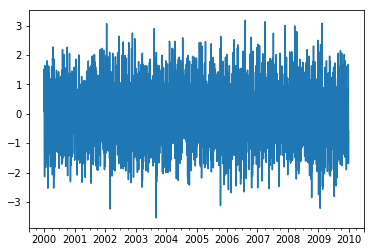

In [149]:
ts = pd.Series(np.random.randn(3650),
                index=pd.date_range('1/1/2000', periods=3650))
ts.plot()

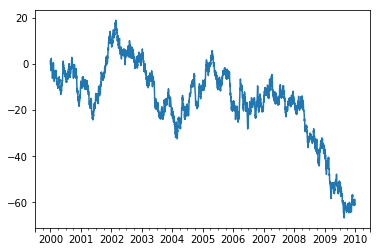

In [150]:
ts = ts.cumsum()
ts.plot()

<Figure size 432x288 with 0 Axes>

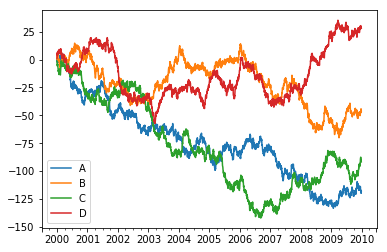

In [153]:
# On a DataFrame, the plot() method is a convenience to plot all of the columns with labels:
#
import matplotlib.pyplot as plt
df = pd.DataFrame(np.random.randn(3650, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure()
df.plot()
plt.legend(loc='best')

## GETTING DATA IN/OUT

### CSV

In [154]:
# Writing to a csv file
df.to_csv('foo.csv')

In [155]:
# Reading from a csv file.
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,-1.039664,0.357450,-1.426368,1.209013
1,2000-01-02,0.052285,1.879981,-2.224674,1.489795
2,2000-01-03,-0.295018,2.319658,-3.468517,3.565884
3,2000-01-04,-1.383827,3.847437,-4.950549,4.299139
4,2000-01-05,-0.989073,4.562603,-5.664791,5.971552
5,2000-01-06,-0.961014,5.206704,-5.742587,3.983699
6,2000-01-07,-1.321866,5.289774,-4.881753,4.470847
7,2000-01-08,-2.822974,3.118154,-4.390338,6.511665
8,2000-01-09,-2.413067,3.234752,-4.717949,6.443466
9,2000-01-10,-1.684496,3.683362,-4.382856,6.427700


### Excel

In [156]:
# Writing to an excel file.
df.to_excel('foo.xlsx', sheet_name='Sheet1')

In [157]:
# Reading from an excel file.
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,A,B,C,D
2000-01-01,-1.039664,0.357450,-1.426368,1.209013
2000-01-02,0.052285,1.879981,-2.224674,1.489795
2000-01-03,-0.295018,2.319658,-3.468517,3.565884
2000-01-04,-1.383827,3.847437,-4.950549,4.299139
2000-01-05,-0.989073,4.562603,-5.664791,5.971552
2000-01-06,-0.961014,5.206704,-5.742587,3.983699
2000-01-07,-1.321866,5.289774,-4.881753,4.470847
2000-01-08,-2.822974,3.118154,-4.390338,6.511665
2000-01-09,-2.413067,3.234752,-4.717949,6.443466
2000-01-10,-1.684496,3.683362,-4.382856,6.427700


In [158]:
# NOW IT'S TIME TO WORK WITH REAL WORLD DATA!!!